# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

<span style='color:blue'>
    
### Data problem definition
To understand what factors make a car more or less expensive.

Based on the given vehicles dataset, we want to:
- Understand all the factors that influence the price of a car. 
- Shortlist some Data models for this feature selection 
- For each data model, 
    - Fit Model with training data, 
    - Know the coefficents associated with each factor. 
    - Evaluate the effectiveness of the chosen model with test data. 
    - Calculate MSE, MAE, RMSE
- Select the best Model for the problem
    
</span>

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

<span style='color:blue'>
    
#### Data analysis
As part of data understanding it is important to know the following:
- Determine size of dataset
- Identify features and target variables
- Find number of null values in the dataset
- Find datatype of the different series
- Handling categorical, ordinal, binary data 
</span>

In [116]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from warnings import filterwarnings 


In [2]:
vehicles = pd.read_csv('data/vehicles.csv')

In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
vehicles.shape

(426880, 18)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

<span style='color:blue'>


### Following steps are done:
    
1. Delete irrelevant columns
2. See if columns are ordinal or categorical or continuous
3. Find out if there is null - handle it accordingly
4. Transform the categorical features to numerical data 
    

</span>

In [5]:
# List of columns to delete - each of these columns do not impact price
columns_to_delete = ['id', 'VIN','region']

# Delete columns in place
vehicles.drop(columns_to_delete, axis=1, inplace=True)

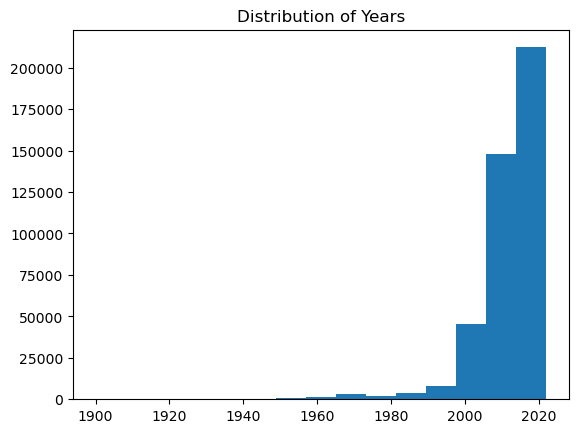

In [6]:
plt.hist(vehicles['year'], bins=15)

# Add title
plt.title('Distribution of Years');

In [7]:
bins = [1900, 2000, 2003, 2006, 2009, 2012, 2015, 2018, 2020]
group = ['<2000', '2000-2003' ,'2003-2006','2006-2009','2009-2012','2012-2015','2015-2018','>2018']
vehicles['year_group'] = pd.cut(x=vehicles['year'], bins=bins, labels=group)
vehicles['year_group'].value_counts()
vehicles.drop(['year'], axis=1, inplace=True)

In [8]:
vehicles['odometer'].min()
bins = [0, 25000, 50000, 75000 ,100000, 125000 , 150000, 200000,10000000]
group = ['<25K', '25K-50K', '50K-75K','75K-100K','100K-125K','125K-150K','150K-200K','>200K']
vehicles['odo_group'] = pd.cut(x=vehicles['odometer'], bins=bins, labels=group)
vehicles['odo_group'].value_counts()
vehicles.drop(['odometer'], axis=1, inplace=True)

In [9]:
temp_models = vehicles["model"].str.split().str[0]
vehicles['model_name'] = temp_models

value_counts = vehicles['model_name'].value_counts()
vehicles['Counts'] = vehicles['model_name'].map(value_counts)
vehicles['UpdatedCategory'] = vehicles.apply(lambda x: x['model_name'] if x['Counts'] > 1500 else None, axis=1)


vehicles.drop(['model_name'], axis=1, inplace=True)
vehicles.drop(['Counts'], axis=1, inplace=True)
vehicles.drop(['model'], axis=1, inplace=True)
vehicles = vehicles.rename(columns={'UpdatedCategory': 'model_name'})


In [10]:
print(vehicles.isnull().sum().sort_values())
print()
print('Shape: ',vehicles.shape)

price                0
state                0
transmission      2556
fuel              3013
year_group        3746
odo_group         6365
title_status      8242
manufacturer     17646
type             92858
paint_color     130203
drive           130567
condition       174104
cylinders       177678
model_name      184643
size            306361
dtype: int64

Shape:  (426880, 15)


<span style='color:blue'>


### Handling Nulls
-  75% of data is size column is null - we can simply drop the column.
- 50% of data in cylinder, condition, drive, paint_color and type columns are null. We can fill it with 'unknown'
    
    
</span>

In [11]:
vehicles.drop('size', axis=1, inplace=True)

vehicles['cylinders'].fillna('unknown', inplace=True)
vehicles['condition'].fillna('unknown', inplace=True)
vehicles['drive'].fillna('unknown', inplace=True)
vehicles['paint_color'].fillna('unknown', inplace=True)
vehicles['type'].fillna('unknown', inplace=True)
vehicles['manufacturer'].fillna('unknown', inplace=True)
vehicles['model_name'].fillna('unknown', inplace=True)




In [12]:
vehicles = vehicles.dropna(axis=0, subset=['year_group'])
vehicles = vehicles.dropna(axis=0, subset=['odo_group'])
vehicles = vehicles.dropna(axis=0, subset=['transmission'])
vehicles = vehicles.dropna(axis=0, subset=['fuel'])
vehicles = vehicles.dropna(axis=0, subset=['title_status'])

In [13]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406888 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         406888 non-null  int64   
 1   manufacturer  406888 non-null  object  
 2   condition     406888 non-null  object  
 3   cylinders     406888 non-null  object  
 4   fuel          406888 non-null  object  
 5   title_status  406888 non-null  object  
 6   transmission  406888 non-null  object  
 7   drive         406888 non-null  object  
 8   type          406888 non-null  object  
 9   paint_color   406888 non-null  object  
 10  state         406888 non-null  object  
 11  year_group    406888 non-null  category
 12  odo_group     406888 non-null  category
 13  model_name    406888 non-null  object  
dtypes: category(2), int64(1), object(11)
memory usage: 41.1+ MB


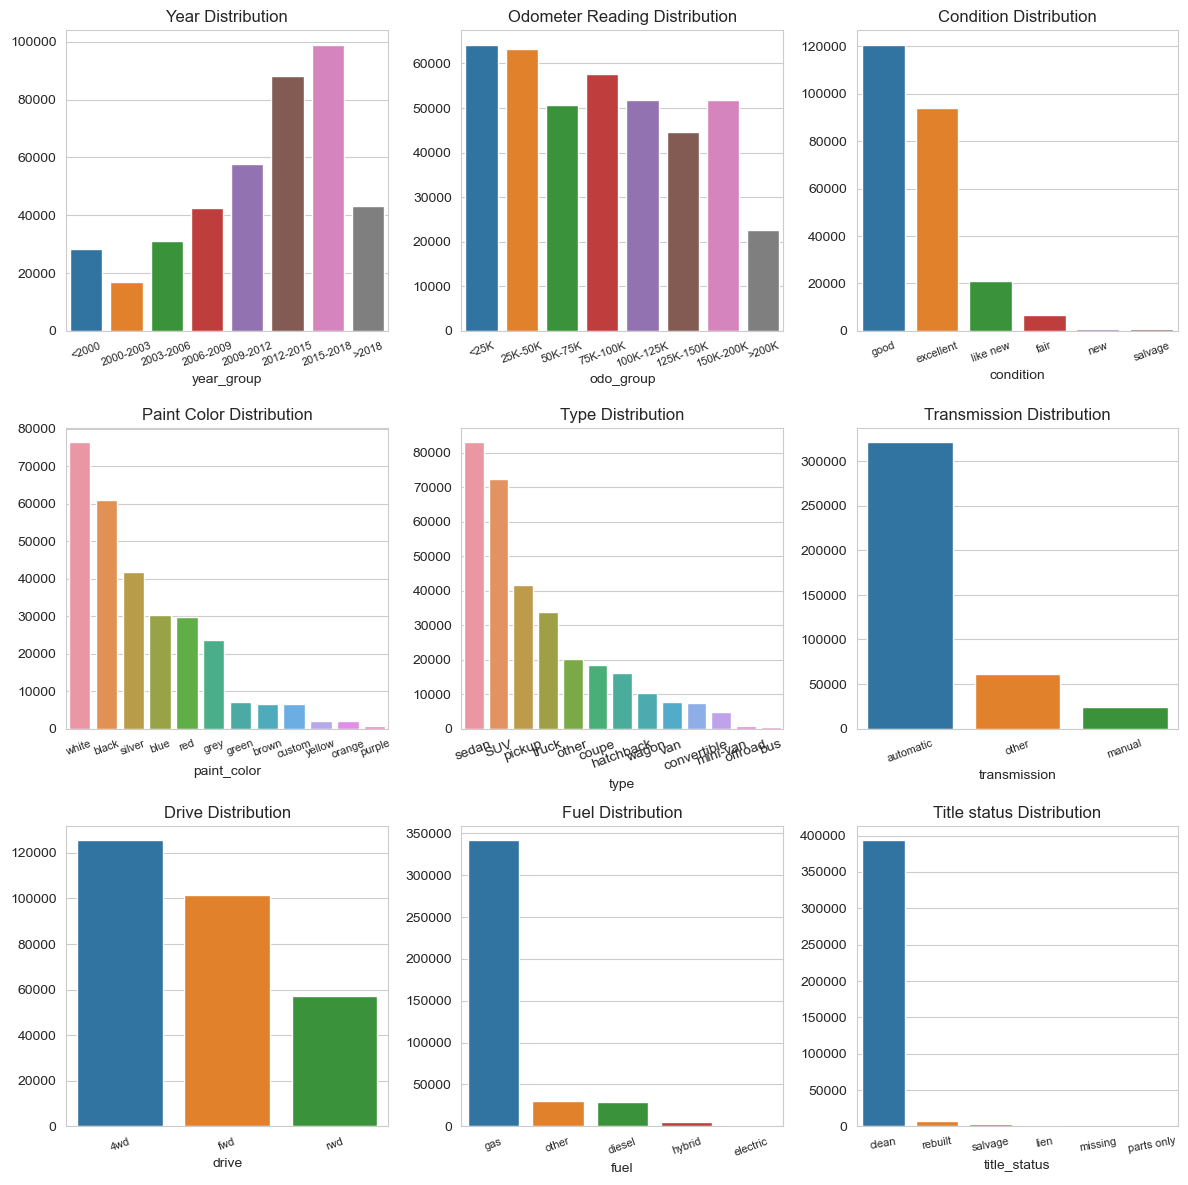

In [14]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

df = vehicles


# Plot for 'Year' column
value_counts = df['year_group'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values,ax=axes[0, 0])
axes[0, 0].set_title('Year Distribution')
axes[0, 0].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'Odometer Reading' column
value_counts = df['odo_group'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Odometer Reading Distribution')
axes[0, 1].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'condition' column
df1 = df.loc[(df['condition'] != 'unknown')]
value_counts = df1['condition'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 2])
axes[0, 2].set_title('Condition Distribution')
axes[0, 2].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'Paint Color Distribution' column
df1 = df.loc[(df['paint_color'] != 'unknown')]
value_counts = df1['paint_color'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Paint Color Distribution')
axes[1, 0].tick_params(axis='x', labelrotation=20,labelsize=8)
#for index, value in enumerate(value_counts.values):
#    axes[1, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')
    
# Plot for 'Type' column
df1 = df.loc[(df['type'] != 'unknown')]
value_counts = df1['type'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Type Distribution')
axes[1, 1].tick_params(axis='x', labelrotation=20)
    
# Plot for 'transmission' column
df1 = df.loc[(df['transmission'] != 'unknown')]
value_counts = df1['transmission'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[1, 2])
axes[1, 2].set_title('Transmission Distribution')
axes[1, 2].tick_params(axis='x', labelrotation=20,labelsize=8)
   
# Plot for 'Drive' column
df1 = df.loc[(df['drive'] != 'unknown')]
value_counts = df1['drive'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 0])
axes[2, 0].set_title('Drive Distribution')
axes[2, 0].tick_params(axis='x', labelrotation=20,labelsize=8)
    
    
# Plot for 'fuel' column
df1 = df.loc[(df['fuel'] != 'unknown')]
value_counts = df1['fuel'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 1])
axes[2, 1].set_title('Fuel Distribution')
axes[2, 1].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'Title Status' column
df1 = df.loc[(df['title_status'] != 'unknown')]
value_counts = df1['title_status'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 2])
axes[2, 2].set_title('Title status Distribution')
axes[2, 2].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'cylinders' column
#df1 = df.loc[(df['cylinders'] != 'unknown')]
#value_counts = df1['cylinders'].value_counts()
#highest_values = value_counts.nlargest(8)
#sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[4, 1])
#axes[4, 1].set_title('Cylinders Distribution')
#axes[4, 1].tick_params(axis='x', labelrotation=20,labelsize=8)


# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)
plt.xticks(fontsize=8)


# Show the plots
plt.show()

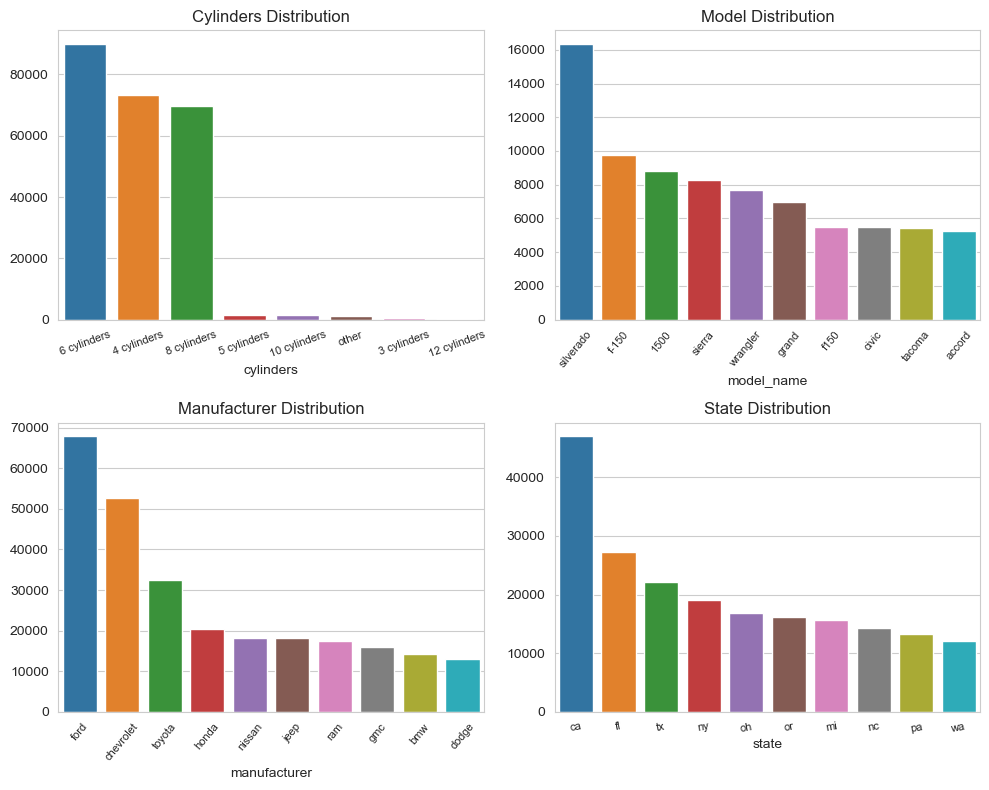

In [161]:
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

df = vehicles

# Plot for 'cylinders' column
df1 = df.loc[(df['cylinders'] != 'unknown')]
value_counts = df1['cylinders'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[0, 0])
axes[0, 0].set_title('Cylinders Distribution')
axes[0, 0].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'model_name Reading' column
df1 = df.loc[(df['model_name'] != 'unknown')]
value_counts = df1['model_name'].value_counts()[:10]
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Model Distribution')
axes[0, 1].tick_params(axis='x', labelrotation=50,labelsize=8)


# Plot for 'manufacturer' column
df1 = df.loc[(df['manufacturer'] != 'unknown')]
value_counts = df1['manufacturer'].value_counts()[:10]
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Manufacturer Distribution')
axes[1, 0].tick_params(axis='x', labelrotation=50,labelsize=8)


# Plot for 'Paint Color Distribution' column
df1 = df.loc[(df['state'] != 'unknown')]
value_counts = df1['state'].value_counts()[:10]
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('State Distribution')
axes[1, 1].tick_params(axis='x', labelrotation=50,labelsize=8)

# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)
plt.xticks(fontsize=8)


# Show the plots
plt.show()

In [26]:
X = vehicles.loc[ : , vehicles.columns != 'price']
y = vehicles['price']

<span style='color:blue'>
    
#### Since all of the features are categorical in nature, it is important to convert them to numerical data. There are two ways to do it: 
- One hot encoding    
- Label encoding 
    
Since there categories do not have any weightage, one-hot encoding is better.

#### With one-hot encoding
</span>


In [27]:
encoded_df = pd.get_dummies(X, columns=['manufacturer','model_name','condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','state','year_group','odo_group'])

In [28]:
encoded_df.shape

(406888, 245)

In [301]:
correlation_matrix = encoded_df.corr()

# Filter the correlation matrix to identify correlations greater than 0.5
high_correlation_pairs = ((correlation_matrix > 0.5) | (correlation_matrix < -0.5)) & (correlation_matrix != 1.0)

# Extract the indices of pairs with high correlation
high_correlation_indices = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(i+1, correlation_matrix.shape[1]) if high_correlation_pairs.iloc[i, j]]

# Extract the names of features with high correlation
high_correlation_features = [(encoded_df.columns[i], encoded_df.columns[j]) for i, j in high_correlation_indices]

# Print the pairs of features with correlation greater than 0.5
print("Pairs of features with correlation greater than 0.5:")
for pair in high_correlation_features:
    print(pair)

Pairs of features with correlation greater than 0.5:
('manufacturer_acura', 'model_name_mdx')
('manufacturer_buick', 'model_name_enclave')
('manufacturer_chevrolet', 'model_name_silverado')
('manufacturer_gmc', 'model_name_sierra')
('manufacturer_honda', 'model_name_civic')
('manufacturer_hyundai', 'model_name_sonata')
('manufacturer_jeep', 'model_name_wrangler')
('manufacturer_mitsubishi', 'model_name_outlander')
('manufacturer_ram', 'model_name_1500')
('manufacturer_tesla', 'fuel_electric')
('manufacturer_volkswagen', 'model_name_jetta')
('condition_good', 'condition_unknown')
('condition_good', 'transmission_other')
('fuel_diesel', 'fuel_gas')
('fuel_gas', 'fuel_other')
('title_status_clean', 'title_status_rebuilt')
('title_status_clean', 'title_status_salvage')
('transmission_automatic', 'transmission_other')
('year_group_>2018', 'odo_group_<25K')


In [31]:
encoded_df.describe(include='all')

,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_datsun,...,year_group_2015-2018,year_group_>2018,odo_group_<25K,odo_group_25K-50K,odo_group_50K-75K,odo_group_75K-100K,odo_group_100K-125K,odo_group_125K-150K,odo_group_150K-200K,odo_group_>200K
count,406888,406888,406888,406888,406888,406888,406888,406888,406888,406888,...,406888,406888,406888,406888,406888,406888,406888,406888,406888,406888
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,401064,406002,406864,399543,392566,401587,400304,354210,401162,406825,...,307872,363563,342657,343579,356217,349236,355062,362246,355030,384189


<span style='color:blue'>
    
#### There are 407K not-null rows with 245 dimensions. 
- Correlation matrix clearly shows that some of the features are strongly correlated
- We need to reduce the dimensions with PCA. 

To do either, first step would be to scale the data and split then test and train data
    
</span>

### Modeling
With your (almost?) final dataset in hand, it is now time to build some models. Here, you should build a number of different regression models with the price as the target. In building your models, you should explore different parameters and be sure to cross-validate your findings.

<span style='color:blue'>

#### Scale Features and target data and split into train and test sets
    
 </span>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df, y, test_size = 0.2, random_state = 42)

In [127]:
# Define column names
columns = ['Model', 'MAE', 'MSE', 'RMSE','R2']

# Create an empty DataFrame with specified columns
metrics_df = pd.DataFrame(columns=columns)

<span style='color:blue'>

 ## Use PCA to reduce dimensionss
</span>

In [104]:
pca = PCA()

# Fit PCA to the data
pca.fit(encoded_df)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index where cumulative explained variance ratio exceeds 90%
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the number of components required to explain 90% of the variance
print("Number of components for 95% variance:", n_components)


Number of components for 95% variance: 122


In [105]:
pca = PCA(n_components=n_components)

# Fit PCA to the data and transform the data to the reduced space
X_reduced = pca.fit_transform(encoded_df)

# Convert the reduced data array to a DataFrame for further analysis or visualization
X_reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(n_components)])

# Use the reduced data for downstream tasks

In [106]:
X_train_pca = pca.fit_transform(X_train)

# Train regression model on PCA-transformed training data
regression_model = LinearRegression()
regression_model.fit(X_train_pca, y_train)

# Transform the test data using the same PCA object used for training
X_test_pca = pca.transform(X_test)

# Make predictions using the trained regression model
y_pred = regression_model.predict(X_test_pca)

# Retrieve the coefficients of the regression model
coefficients = regression_model.coef_

abs_coefs = np.abs(coefficients)
sorted_abs_coefs = np.sort(abs_coefs)[::-1]

feature_indices_sorted_desc = abs_coefs.argsort()[::-1]


most_important_features = []
for index in feature_indices_sorted_desc:
    most_important_features.append(encoded_df.columns[index])
    
    
new_column_names = pd.Series(most_important_features)

# Rename columns
X_reduced_df.rename(columns=dict(zip(X_reduced_df.columns, new_column_names)), inplace=True)

# Print updated dataframe
print(X_reduced_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406888 entries, 0 to 406887
Columns: 122 entries, condition_good to manufacturer_gmc
dtypes: float64(122)
memory usage: 378.7 MB
None


In [107]:
X_reduced_df.shape

(406888, 122)

<span style='color:blue'>
    
### Total 122 out of 245 dimensions can predict the variance of the data 95% of the times. We have now created a new dataset with reduced dimensions.
    
 </span>

<span style='color:blue'>

## PCA Regression
    
</span>

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_df, y, test_size = 0.2, random_state = 42)

Mean Absolute Error (MAE) for PCA Regression model: 232879.28578987808
Mean Squared Error (MSE) for PCA Regression model: 112600712420743.86
Root Mean Squared Error (RMSE) for PCA Regression model: 10611348.28477248
R-squared (R2) for PCA Regression model: 1.0385410350366442e-05

Top 30 most important features:


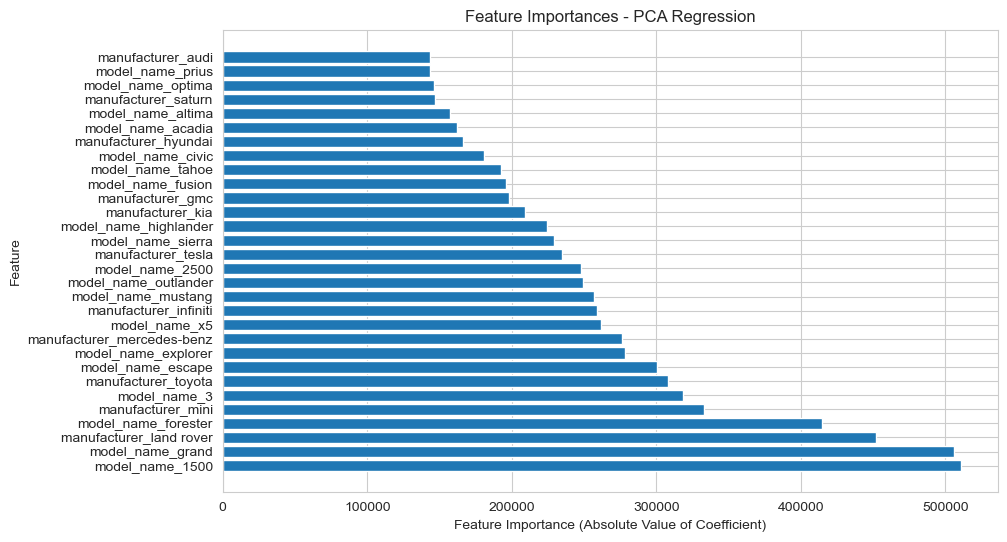

In [129]:
pca = PCA(n_components=n_components)  # Choose the number of components
X_train_pca = pca.fit_transform(X_train)

# Train regression model on PCA-transformed training data
regression_model = LinearRegression()
regression_model.fit(X_train_pca, y_train)

# Transform the test data using the same PCA object used for training
X_test_pca = pca.transform(X_test)

# Make predictions using the trained regression model
y_pred = regression_model.predict(X_test_pca)


# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE) for PCA Regression model:", mae)
print("Mean Squared Error (MSE) for PCA Regression model:", mse)
print("Root Mean Squared Error (RMSE) for PCA Regression model:", rmse)
print("R-squared (R2) for PCA Regression model:",r2)
print()

new_row = {'Model': 'PCA Regression', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)


# Retrieve the coefficients of the regression model
coefficients = regression_model.coef_

abs_coefs = np.abs(coefficients)
sorted_abs_coefs = np.sort(abs_coefs)[::-1]

# Print the top 30 most important features
feature_indices_sorted_desc = abs_coefs.argsort()[::-1]
most_important_indices = feature_indices_sorted_desc[:30]  # Top 30 indices
most_important_features = []
print("Top 30 most important features:")
for index in most_important_indices:
    most_important_features.append(X_train.columns[index])
    

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(most_important_features, sorted_abs_coefs[:30] )
plt.xlabel('Feature Importance (Absolute Value of Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importances - PCA Regression')
plt.show()

<span style='color:blue'>

## Multiple Regression
    
</span>

Mean Absolute Error (MAE) for Multiple Regression model: 232879.28578987796
Mean Squared Error (MSE) for Multiple Regression model: 112600712420743.86
Root Mean Squared Error (RMSE) for Multiple Regression model: 10611348.28477248
R-squared (R2) for Multiple Regression model: 1.0385410350366442e-05


Top 30 most important features:


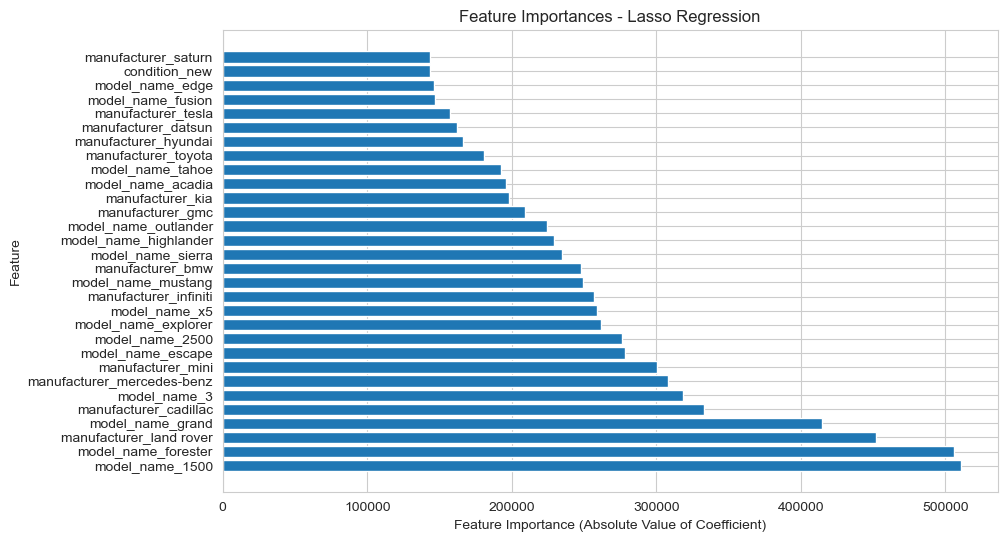

In [130]:
# Train multiple regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = regression_model.predict(X_test)

# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE) for Multiple Regression model:", mae)
print("Mean Squared Error (MSE) for Multiple Regression model:", mse)
print("Root Mean Squared Error (RMSE) for Multiple Regression model:", rmse)
print("R-squared (R2) for Multiple Regression model:",r2)
print()

new_row = {'Model': 'Multiple Regression', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)


non_zero_coefficients = regression_model.coef_
abs_coefs = np.abs(regression_model.coef_)

# Get the feature names
feature_names = X_train.columns  # Replace with your feature names

print()

# Print the top 30 most important features
feature_indices_sorted_desc = abs_coefs.argsort()[::-1]
most_important_indices = feature_indices_sorted_desc[:30]  # Top 30 indices
most_important_features = []
print("Top 30 most important features:")
for index in most_important_indices:
    most_important_features.append(X_train.columns[index])
    

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(most_important_features, sorted_abs_coefs[:30] )
plt.xlabel('Feature Importance (Absolute Value of Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importances - Lasso Regression')
plt.show()


<span style='color:blue'>

## Lasso Regression
    
</span>

In [111]:
# Define a grid of alpha values
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=Lasso(max_iter=100000), param_grid={'alpha': alphas}, cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print('Best Alpha:',best_alpha)

Best Alpha: 10.0


Mean Absolute Error (MAE) for Lasso Regression model: 232523.96477106365
Mean Squared Error (MSE) for Lasso Regression model: 112600602289139.9
Root Mean Squared Error (RMSE) for Lasso Regression model: 10611343.095439894
R-squared (R2) for Lasso Regression model: 1.136347219232725e-05


Top 30 most important features:


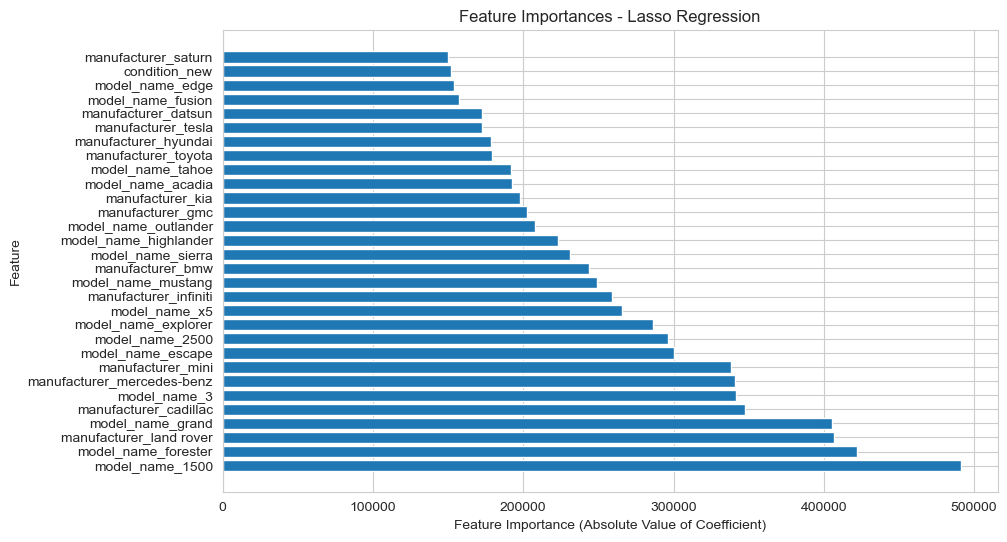

In [131]:
lasso = Lasso(alpha=10, max_iter=10000)  # You can adjust the regularization strength (alpha) as needed
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)


# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE) for Lasso Regression model:", mae)
print("Mean Squared Error (MSE) for Lasso Regression model:", mse)
print("Root Mean Squared Error (RMSE) for Lasso Regression model:", rmse)
print("R-squared (R2) for Lasso Regression model:",r2)
print()

new_row = {'Model': 'Lasso Regression', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)



# Print the coefficients
#print("Coefficients:", lasso.coef_)
#print("Intercept:", lasso.intercept_)

non_zero_coefficients = lasso.coef_
non_zero_indices = np.where(non_zero_coefficients != 0)[0]

# Get the feature names
feature_names = X_train.columns  # Replace with your feature names

print()
# Print the feature names along with their non-zero coefficients
#for index in non_zero_indices:
#    print(f"{feature_names[index]}: {non_zero_coefficients[index]}")

abs_coefs = np.abs(lasso.coef_)
sorted_abs_coefs = np.sort(abs_coefs)[::-1]



# Print the top 30 most important features
feature_indices_sorted_desc = abs_coefs.argsort()[::-1]
most_important_indices = feature_indices_sorted_desc[:30]  # Top 30 indices
most_important_features = []
print("Top 30 most important features:")
for index in most_important_indices:
    most_important_features.append(X_train.columns[index])
    

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(most_important_features, sorted_abs_coefs[:30] )
plt.xlabel('Feature Importance (Absolute Value of Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importances - Lasso Regression')
plt.show()

<span style='color:blue'>


## Ridge Regression
</span>

In [113]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0]

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=Ridge(), param_grid={'alpha': alphas}, cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print('Best Alpha:',best_alpha)

Best Alpha: 10.0


Mean Absolute Error (MAE) for Ridge Regression model: 232662.18194080653
Mean Squared Error (MSE) for Ridge Regression model: 112600602003803.25
Root Mean Squared Error (RMSE) for Ridge Regression model: 10611343.081995005
R-squared (R2) for Linear Ridge model: 1.1366006223312297e-05


Top 30 most important features:


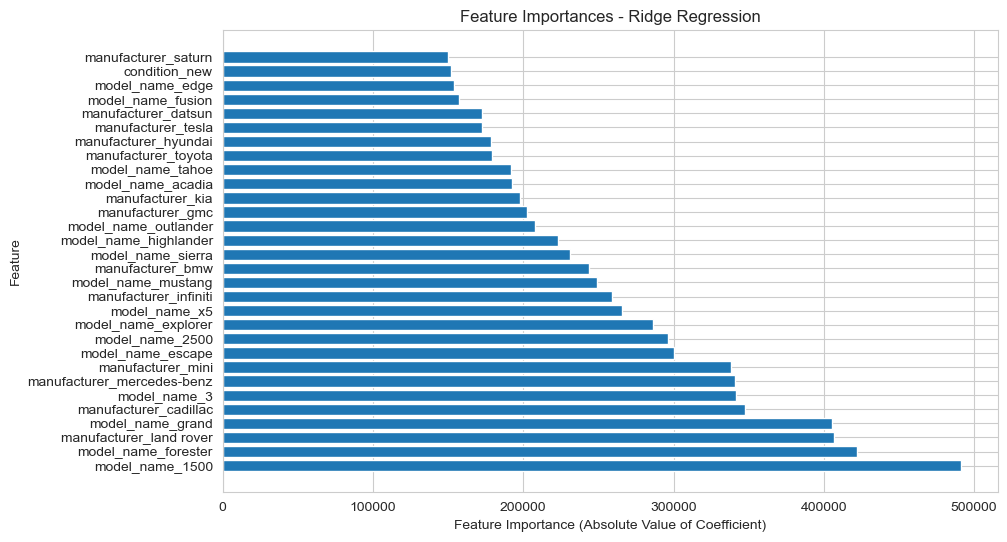

In [132]:
ridge = Ridge(alpha=10.0)  # You can adjust the regularization strength (alpha) as needed

# Train the model on the training data
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)


# Calculate Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE) for Ridge Regression model:", mae)
print("Mean Squared Error (MSE) for Ridge Regression model:", mse)
print("Root Mean Squared Error (RMSE) for Ridge Regression model:", rmse)
print("R-squared (R2) for Linear Ridge model:",r2)
print()

new_row = {'Model': 'Ridge Regression', 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}
metrics_df = pd.concat([metrics_df, pd.DataFrame([new_row])], ignore_index=True)


# Print the coefficients
#print("Coefficients:", ridge.coef_)
#print("Intercept:", ridge.intercept_)


coefficients = ridge.coef_

# Get the feature names
feature_names = X_train.columns # Replace with your feature names

print()
# Print the feature names along with their coefficients
#for feature, coef in zip(feature_names, coefficients):
#    print(f"{feature}: {coef}")

abs_coefs = np.abs(lasso.coef_)
sorted_abs_coefs = np.sort(abs_coefs)[::-1]



# Print the top 30 most important features
feature_indices_sorted_desc = abs_coefs.argsort()[::-1]
most_important_indices = feature_indices_sorted_desc[:30]  # Top 30 indices
most_important_features = []
print("Top 30 most important features:")
for index in most_important_indices:
    most_important_features.append(X_train.columns[index])
    

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(most_important_features, sorted_abs_coefs[:30] )
plt.xlabel('Feature Importance (Absolute Value of Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importances - Ridge Regression')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [133]:
metrics_df

,Model,MAE,MSE,RMSE,R2
0,PCA Regression,232879.285790,1.126007e+14,1.061135e+07,0.000010
1,Multiple Regression,232879.285790,1.126007e+14,1.061135e+07,0.000010
2,Lasso Regression,232523.964771,1.126006e+14,1.061134e+07,0.000011
3,Ridge Regression,232662.181941,1.126006e+14,1.061134e+07,0.000011


In [136]:
sorted_df = metrics_df.sort_values(by='MAE', ascending=True)
print(sorted_mae_df)

                 Model            MAE           MSE          RMSE        R2
2     Lasso Regression  232523.964771  1.126006e+14  1.061134e+07  0.000011
3     Ridge Regression  232662.181941  1.126006e+14  1.061134e+07  0.000011
1  Multiple Regression  232879.285790  1.126007e+14  1.061135e+07  0.000010
0       PCA Regression  232879.285790  1.126007e+14  1.061135e+07  0.000010


In [137]:
sorted_df = metrics_df.sort_values(by='MSE', ascending=True)
print(sorted_mse_df)

                 Model            MAE           MSE          RMSE        R2
3     Ridge Regression  232662.181941  1.126006e+14  1.061134e+07  0.000011
2     Lasso Regression  232523.964771  1.126006e+14  1.061134e+07  0.000011
0       PCA Regression  232879.285790  1.126007e+14  1.061135e+07  0.000010
1  Multiple Regression  232879.285790  1.126007e+14  1.061135e+07  0.000010


In [139]:
sorted_rmse_df = metrics_df.sort_values(by='RMSE', ascending=True)
print(sorted_rmse_df)

                 Model            MAE           MSE          RMSE        R2
3     Ridge Regression  232662.181941  1.126006e+14  1.061134e+07  0.000011
2     Lasso Regression  232523.964771  1.126006e+14  1.061134e+07  0.000011
0       PCA Regression  232879.285790  1.126007e+14  1.061135e+07  0.000010
1  Multiple Regression  232879.285790  1.126007e+14  1.061135e+07  0.000010


In [140]:
sorted_r2_df = metrics_df.sort_values(by='R2', ascending=True)
print(sorted_r2_df)

                 Model            MAE           MSE          RMSE        R2
0       PCA Regression  232879.285790  1.126007e+14  1.061135e+07  0.000010
1  Multiple Regression  232879.285790  1.126007e+14  1.061135e+07  0.000010
2     Lasso Regression  232523.964771  1.126006e+14  1.061134e+07  0.000011
3     Ridge Regression  232662.181941  1.126006e+14  1.061134e+07  0.000011


<span style='color:blue'>

## Ridge Model seems to be the best model for prediction with least MSE and RMSE.
    
</span>

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<span style='color:blue'>

# At the end of the day, Model and Manufacturer predicts the value of a car. 
    
  ### Next Steps/Recommendations:
- Rerun the study for the top models and manufacturers and see what other dimensions impacts the pricing of the cars.

    
</span>

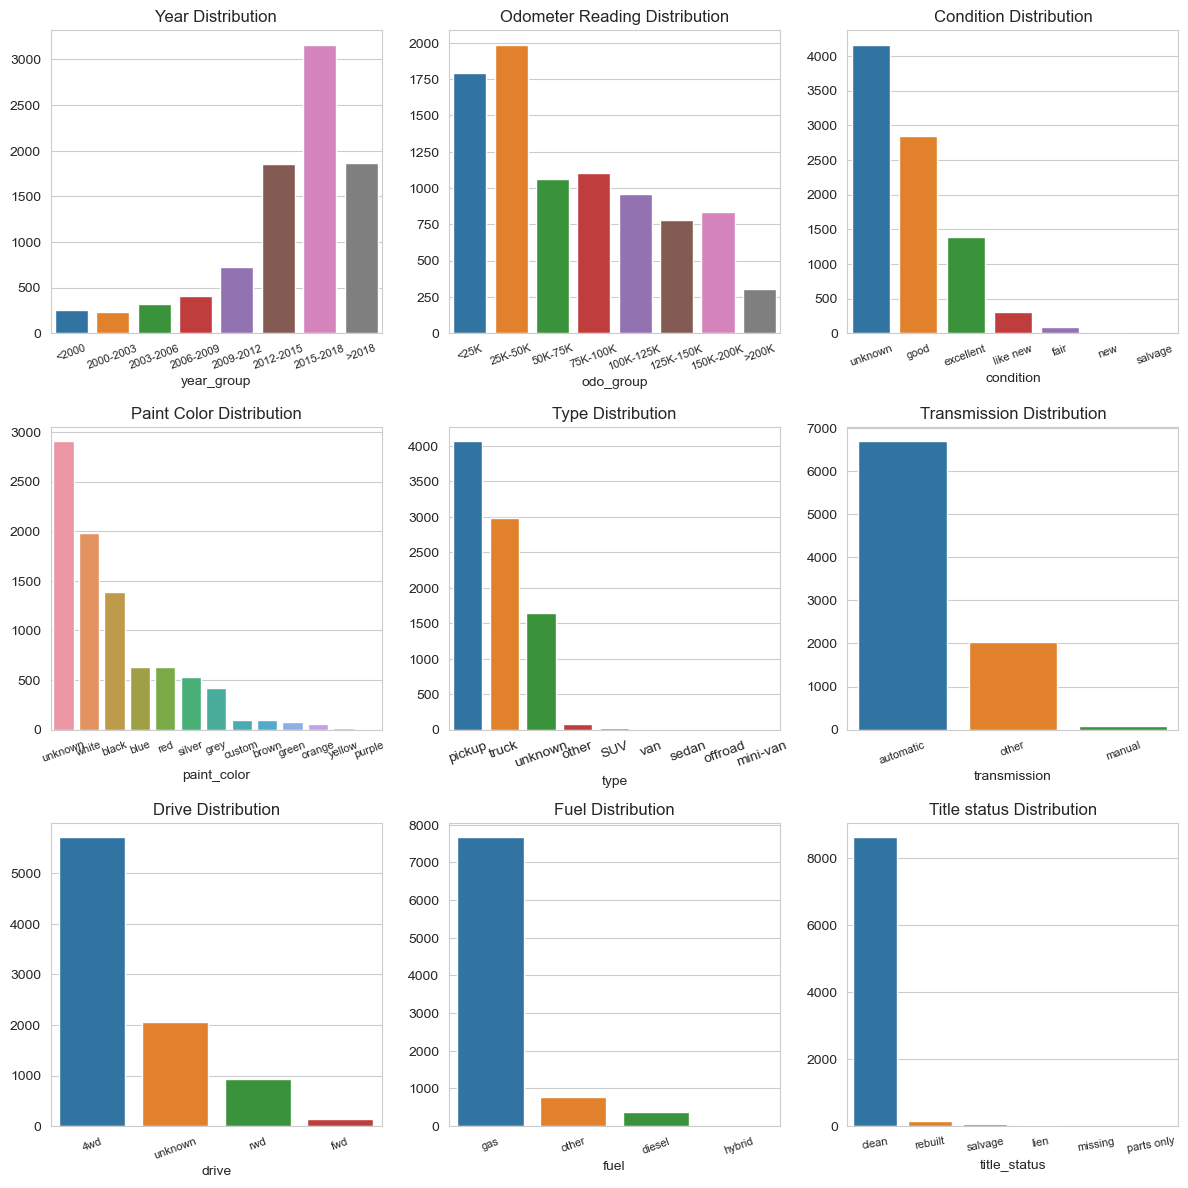

In [159]:

sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

df = vehicles.loc[(vehicles['model_name'] == '1500')]


# Plot for 'Year' column
value_counts = df['year_group'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values,ax=axes[0, 0])
axes[0, 0].set_title('Year Distribution')
axes[0, 0].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'Odometer Reading' column
value_counts = df['odo_group'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 1])
axes[0, 1].set_title('Odometer Reading Distribution')
axes[0, 1].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'condition' column
df1 = df.loc[(df['condition'] != 'unknown')]
value_counts = df['condition'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[0, 2])
axes[0, 2].set_title('Condition Distribution')
axes[0, 2].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'Paint Color Distribution' column
df1 = df.loc[(df['paint_color'] != 'unknown')]
value_counts = df['paint_color'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 0])
axes[1, 0].set_title('Paint Color Distribution')
axes[1, 0].tick_params(axis='x', labelrotation=20,labelsize=8)
#for index, value in enumerate(value_counts.values):
#    axes[1, 1].text(index, value + 0.5, str(round(value,1)), ha='center', va='bottom')
    
# Plot for 'Type' column
df1 = df.loc[(df['type'] != 'unknown')]
value_counts = df['type'].value_counts()
sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[1, 1])
axes[1, 1].set_title('Type Distribution')
axes[1, 1].tick_params(axis='x', labelrotation=20)
    
# Plot for 'transmission' column
df1 = df.loc[(df['transmission'] != 'unknown')]
value_counts = df['transmission'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[1, 2])
axes[1, 2].set_title('Transmission Distribution')
axes[1, 2].tick_params(axis='x', labelrotation=20,labelsize=8)
   
# Plot for 'Drive' column
df1 = df.loc[(df['drive'] != 'unknown')]
value_counts = df['drive'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 0])
axes[2, 0].set_title('Drive Distribution')
axes[2, 0].tick_params(axis='x', labelrotation=20,labelsize=8)
    
    
# Plot for 'fuel' column
df1 = df.loc[(df['fuel'] != 'unknown')]
value_counts = df['fuel'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 1])
axes[2, 1].set_title('Fuel Distribution')
axes[2, 1].tick_params(axis='x', labelrotation=20,labelsize=8)

# Plot for 'Title Status' column
df1 = df.loc[(df['title_status'] != 'unknown')]
value_counts = df['title_status'].value_counts()
highest_values = value_counts.nlargest(8)
sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[2, 2])
axes[2, 2].set_title('Title status Distribution')
axes[2, 2].tick_params(axis='x', labelrotation=20,labelsize=8)


# Plot for 'cylinders' column
#df1 = df.loc[(df['cylinders'] != 'unknown')]
#value_counts = df1['cylinders'].value_counts()
#highest_values = value_counts.nlargest(8)
#sns.barplot(x=highest_values.index, y=highest_values.values, ax=axes[4, 1])
#axes[4, 1].set_title('Cylinders Distribution')
#axes[4, 1].tick_params(axis='x', labelrotation=20,labelsize=8)


# Adjust layout
plt.tight_layout()
plt.xticks(rotation=10)
plt.xticks(fontsize=8)


# Show the plots
plt.show()

In [197]:
df = vehicles

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406888 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   price         406888 non-null  int64   
 1   manufacturer  406888 non-null  object  
 2   condition     406888 non-null  object  
 3   cylinders     406888 non-null  object  
 4   fuel          406888 non-null  object  
 5   title_status  406888 non-null  object  
 6   transmission  406888 non-null  object  
 7   drive         406888 non-null  object  
 8   type          406888 non-null  object  
 9   paint_color   406888 non-null  object  
 10  state         406888 non-null  object  
 11  year_group    406888 non-null  category
 12  odo_group     406888 non-null  category
 13  model_name    406888 non-null  object  
dtypes: category(2), int64(1), object(11)
memory usage: 41.1+ MB


In [199]:
# List of columns to delete - each of these columns do not impact price
columns_to_delete = ['model_name', 'manufacturer']

# Delete columns in place
df.drop(columns_to_delete, axis=1, inplace=True)

In [242]:
df['title_status'].value_counts()

title_status
clean         155052
rebuilt         4136
salvage         1936
lien             902
missing          296
parts only        62
Name: count, dtype: int64

In [231]:
df = df[df['drive'] != 'unknown']
df = df[df['cylinders'] != 'unknown']
df = df[df['type'] != 'unknown']
df = df[df['paint_color'] != 'unknown']

In [232]:
X = df.loc[ : , df.columns != 'price']
y = df['price']

In [233]:
encoded_df = pd.get_dummies(X, columns=['condition','cylinders','fuel','title_status','transmission','drive','type','paint_color','state','year_group','odo_group'])

In [234]:
encoded_df.shape

(162384, 124)

In [235]:
pca = PCA()

# Fit PCA to the data
pca.fit(encoded_df)

# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index where cumulative explained variance ratio exceeds 90%
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the number of components required to explain 90% of the variance
print("Number of components for 95% variance:", n_components)

Number of components for 95% variance: 66


In [236]:
pca = PCA(n_components=n_components)

# Fit PCA to the data and transform the data to the reduced space
X_reduced = pca.fit_transform(encoded_df)

# Convert the reduced data array to a DataFrame for further analysis or visualization
X_reduced_df = pd.DataFrame(X_reduced, columns=[f"PC{i+1}" for i in range(n_components)])

# Use the reduced data for downstream tasks

In [237]:
X_train_pca = pca.fit_transform(X_train)

# Train regression model on PCA-transformed training data
regression_model = LinearRegression()
regression_model.fit(X_train_pca, y_train)

# Transform the test data using the same PCA object used for training
X_test_pca = pca.transform(X_test)

# Make predictions using the trained regression model
y_pred = regression_model.predict(X_test_pca)

# Retrieve the coefficients of the regression model
coefficients = regression_model.coef_

abs_coefs = np.abs(coefficients)
sorted_abs_coefs = np.sort(abs_coefs)[::-1]

feature_indices_sorted_desc = abs_coefs.argsort()[::-1]


most_important_features = []
for index in feature_indices_sorted_desc:
    most_important_features.append(encoded_df.columns[index])
    
    
new_column_names = pd.Series(most_important_features)

# Rename columns
X_reduced_df.rename(columns=dict(zip(X_reduced_df.columns, new_column_names)), inplace=True)

# Print updated dataframe
print(X_reduced_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162384 entries, 0 to 162383
Data columns (total 66 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   state_dc                 162384 non-null  float64
 1   drive_fwd                162384 non-null  float64
 2   type_convertible         162384 non-null  float64
 3   state_co                 162384 non-null  float64
 4   paint_color_blue         162384 non-null  float64
 5   type_SUV                 162384 non-null  float64
 6   state_de                 162384 non-null  float64
 7   paint_color_red          162384 non-null  float64
 8   paint_color_purple       162384 non-null  float64
 9   fuel_hybrid              162384 non-null  float64
 10  state_al                 162384 non-null  float64
 11  state_az                 162384 non-null  float64
 12  paint_color_orange       162384 non-null  float64
 13  state_ca                 162384 non-null  float64
 14  pain

In [238]:
i=0
shortened_features = []
for val in X_reduced_df.columns:
    shortName = val.split("_")[0]
    if shortName not in shortened_features:
        shortened_features.append(shortName) 

In [239]:
print(shortened_features)

['state', 'drive', 'type', 'paint', 'fuel', 'title', 'transmission', 'condition', 'cylinders']
